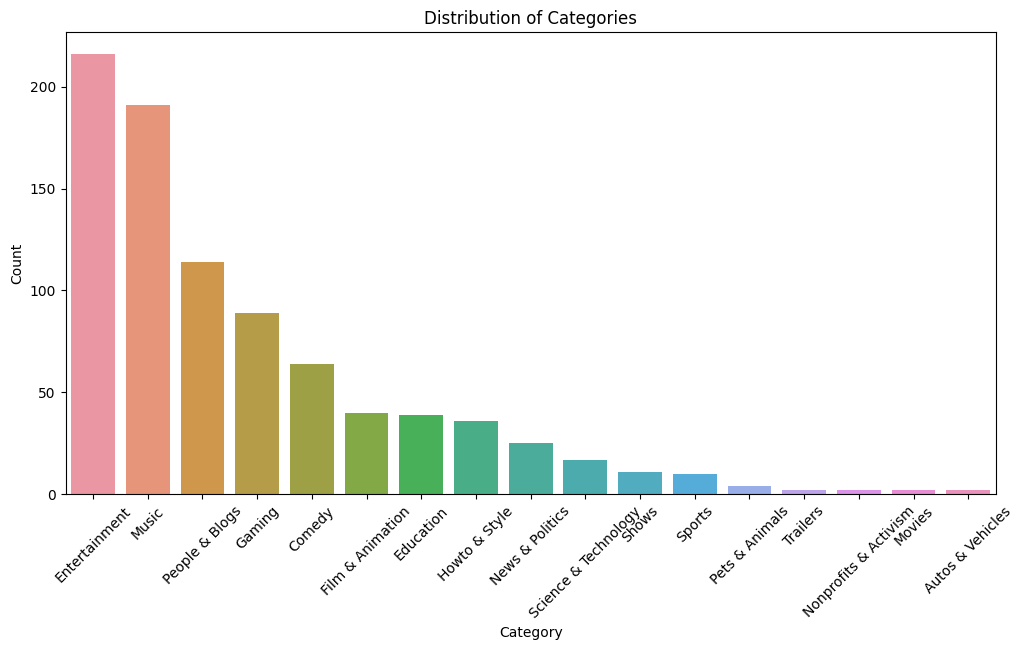

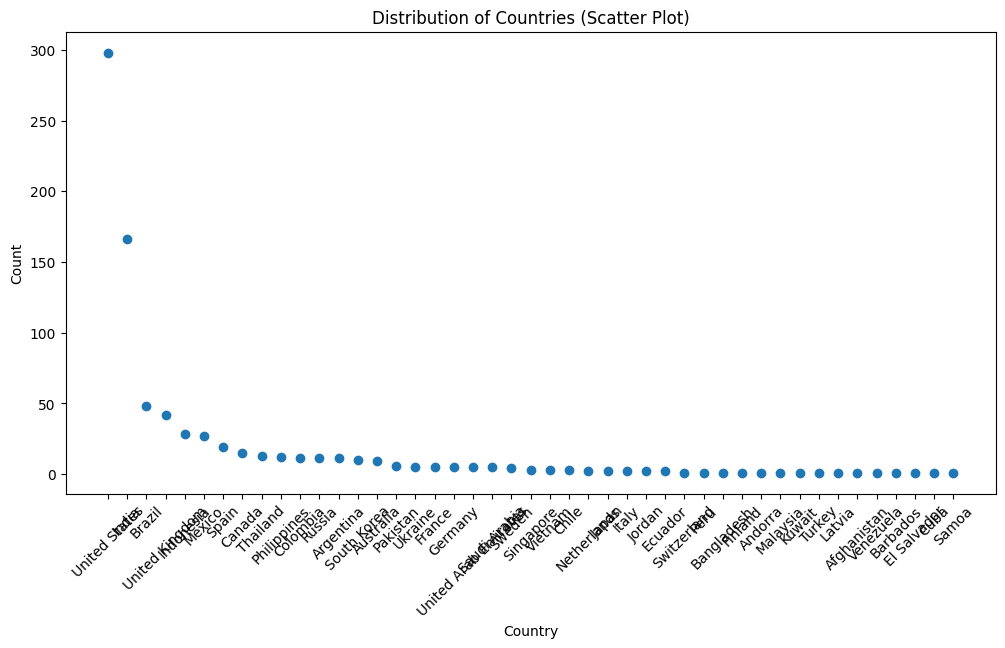

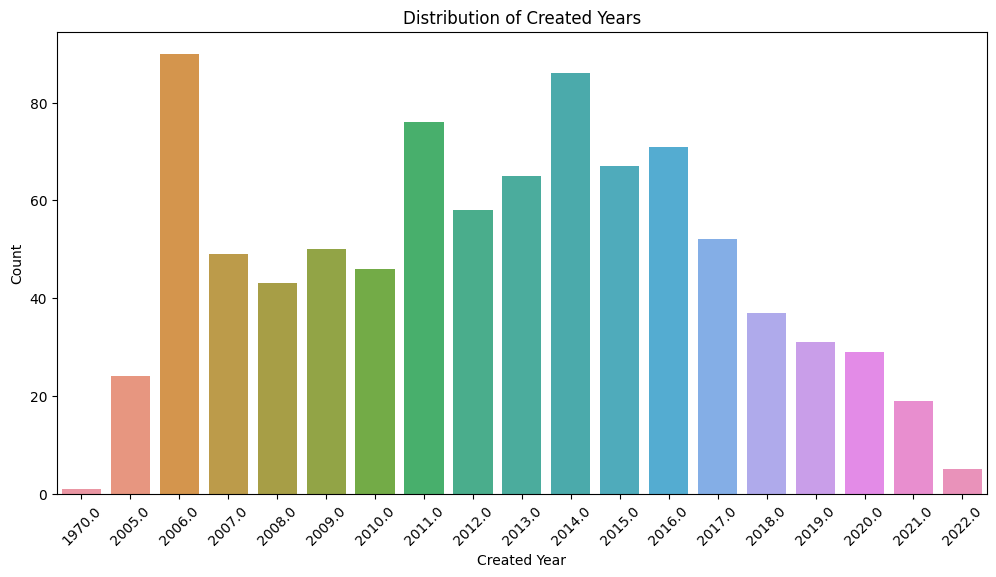

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Try reading with different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']
data = None

for encoding in encodings_to_try:
    try:
        data = pd.read_csv('/data youtube.csv', encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        print(f"Failed to decode using {encoding} encoding")

if data is None:
    print("Unable to read the file with any of the tried encodings. Please check the file's encoding.")
else:
    # Univariate analysis for 'category'
    category_counts = data['category'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Distribution of Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Assuming 'country_counts' is the count of each country
    country_counts = data['Country'].value_counts()

    # Create a scatter plot for country distribution
    plt.figure(figsize=(12, 6))
    plt.scatter(country_counts.index, country_counts.values)
    plt.title('Distribution of Countries (Scatter Plot)')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Univariate analysis for 'created_year'
    # Assuming column name is 'created_year'
    created_year_counts = data['created_year'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=created_year_counts.index, y=created_year_counts.values)
    plt.title('Distribution of Created Years')
    plt.xlabel('Created Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



In [ ]:

# Calculate the average ratio of video views to subscribers for the last 30 days
video_views_last_30_days = data['video_views_for_the_last_30_days']
subscribers_last_30_days = data['subscribers_for_last_30_days']

# Ensure both columns have numerical values
video_views_last_30_days = pd.to_numeric(video_views_last_30_days, errors='coerce')
subscribers_last_30_days = pd.to_numeric(subscribers_last_30_days, errors='coerce')

# Calculate the ratio
ratio_series = video_views_last_30_days / subscribers_last_30_days

# Drop any NaN (Not a Number) values
ratio_series.dropna(inplace=True)

# Calculate the average ratio
average_ratio = ratio_series.mean()

print("Average Ratio of Video Views to Subscribers for the Last 30 Days:", average_ratio)


Average Ratio of Video Views to Subscribers for the Last 30 Days: 916.880533715767


In [5]:

# Ensure both columns have numerical values
data['uploads'] = pd.to_numeric(data['uploads'], errors='coerce')
data['subscribers'] = pd.to_numeric(data['subscribers'], errors='coerce')

# Calculate the correlation
correlation = data['uploads'].corr(data['subscribers'])

print("Correlation between 'uploads' and 'subscribers':", correlation)

Correlation between 'uploads' and 'subscribers': 0.07630549934768688


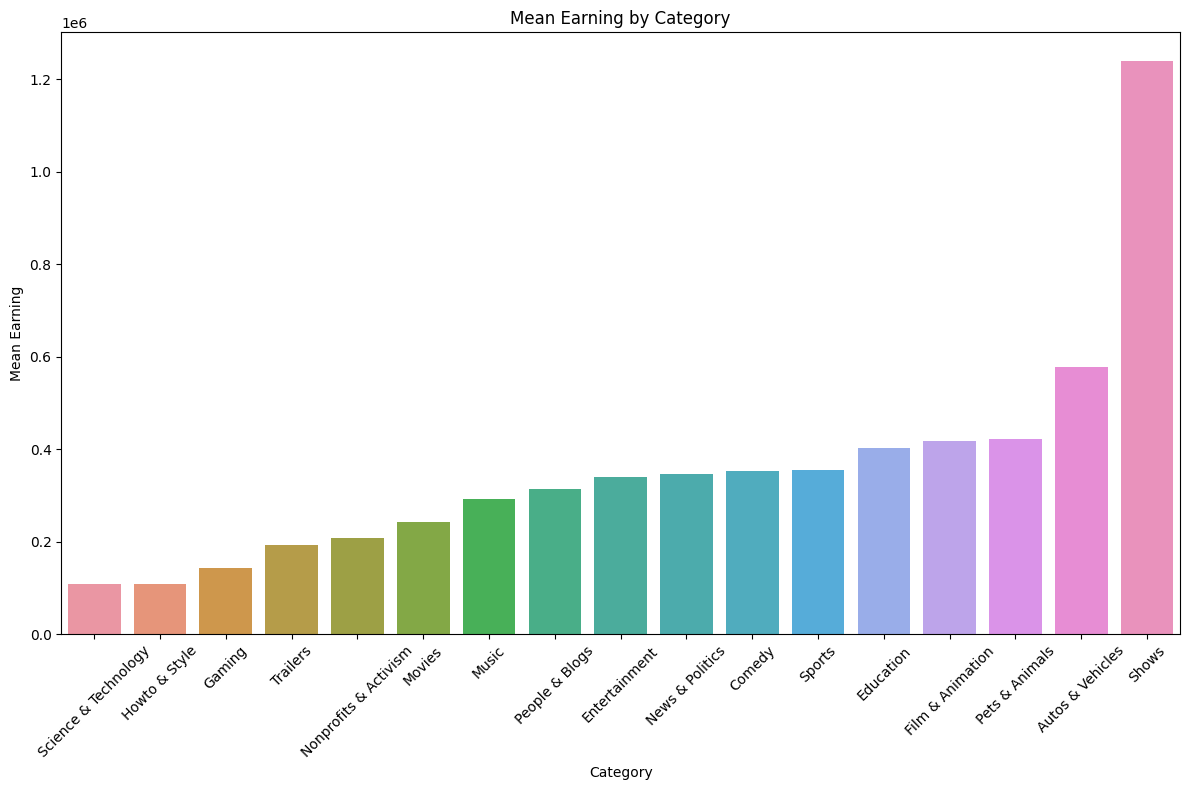

In [4]:
# Function to extract the mean value from earnings_range
def extract_mean(earning_range):
    # Split the range by "-"
    values = earning_range.split('-')

    # Convert values to float and calculate mean
    values = [float(val.replace(',', '')) for val in values]
    return sum(values) / len(values)

# Convert earnings_range to mean earnings
data['mean_earning'] = data['earnings_range'].apply(extract_mean)

# Group by 'category' and calculate the mean 'mean_earning' for each category
earning_mean_by_category = data.groupby('category')['mean_earning'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=earning_mean_by_category.index, y=earning_mean_by_category.values)
plt.title('Mean Earning by Category')
plt.xlabel('Category')
plt.ylabel('Mean Earning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df = pd.DataFrame(data)

# Calculate the correlation between 'video views' and 'uploads'
correlation = df['video views'].corr(df['uploads'])

# Print the correlation
print('Correlation between video views and uploads:', correlation)

Correlation between video views and uploads: 0.41516791820367904
